#COMP5046_Ass1_2022


# Readme
1. In the whole project, I wrote many functions for myself to keep my code tidy. And almost all of them will be called before the main codes of each section of the project.

2. I saved many models, graphs that trained in the project in my google drive and they will be loaded in section 1 of the project, it may take some time to process it. Due to the fact that I saved many models, graphs, tables to use in my project, my codes in section 4 of the project only contain one example of testing -> which is what we asked to do -> to left one runnable testing code in section 4 and comment out other testing codes in section 4.

3. The model trained in section 3 used the best choice of variables including epoch number, learning rate, etc.

4. Because I will comment many parts of section 4 (because only one testing code will be kept), some "normal comments" are also commented -> they are "double-commented".

Have a good day!

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [ ]:
# Extract the labels and posts and store into List
# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()
# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()
# Next four lines are preparing for section 4
later_test_training_posts = training_posts
later_test_testing_posts = testing_posts
later_test_training_labels = training_labels
later_test_testing_labels = testing_labels

In [ ]:
print(training_labels)

['F', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'T', 'T',

In [ ]:
# Before doing anything for the assignment, we need to access files from my drive
# which I saved constructed models, .txt files. They will be used in later chunks

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_ids = ["1-KEH-EAEM8OF07-5_WB2FsLta9FQSUSP", "1-BGzTVoZESYBMW8GqaO49DRPFBsEbkXf", "1-Z4zJdqWpE1cOCfVWNLfcpifHXAUmjPc", "1-XXhhPsjsUL8lbFfuNuJQAHitQ4AutDZ", "1-ObMls8O7S5ldDl0B_rZztmHoohHKJsb", "1-PArm5nFO0ExuSqx_H5-CGYhiup4jXDg", "1-FBqJoDlP6YAl3CgVHLf11Zsu4jiq1Xe", "1-B511sOBso9H02K3uwLsrJRFoLLI9wpU", "1-8KaxkEEFgB6qj-7Qi0LvRu2fjDRi78j", "1-NCzEs-k9fFHZ66NzJ_3Tsfk52eP4I0F", "1-RnfqxJs7M9VCctbHNNaat4o7REMTqeN", "1-EWB5ISPNTONOFLpw6c2HcPKd1A10t_G"]
file_names = ["dimention_text.txt", "best_model.pt", "f1_lr_0_0_1_epoch5.txt", "f1_lr_0_0_1.txt", "later_test_testing_posts.txt", "my_sg_model.pt", "my_wv_model.pt", "testing_p.txt", "training_p.txt", "window_size_text.txt", "wv_model_200.pt", "wv_model2.pt"]
def get_files(ids, file_name):
    for i in range(len(ids)):
        downloaded = drive.CreateFile({'id':ids[i]}) 
        downloaded.GetContentFile(file_name[i]) 
get_files(file_ids, file_names)

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
# # This part is for URL removal but takes bit long, so I comment it out and we will
# # See the complete(doing url removal, stemming, case-folding, etc.), final version of preprocessed datasets in next few chunks

# for i in range(len(training_posts)):
#   training_posts[i] = training_posts[i].replace("|||", " ")
#   training_posts[i] = re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',training_posts[i])
# for j in range(len(testing_posts)):
#   testing_posts[j] = testing_posts[j].replace("|||", " ")
#   testing_posts[j] = re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',testing_posts[j])


## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# # This chunk is used to preprocessing the dataset, but it takes tooooooo long,
# # So I just comment it out and we will just load preprocessed-already datasets from the drive in next few chunks

# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords as sw
# from nltk.tokenize import word_tokenize
# from nltk.stem.porter import *
# numbers = [i for i in range(10)]
# stop_words = sw.words()
# stemmer = PorterStemmer()

# tt = open("training_p.txt", "w")
# te = open("testing_p.txt", "w")

# for i in range(7808):
#   training_posts[i] = training_posts[i].lower() # turn to lowercase to make analysis case-sensitivity to avoid analyzing same words repeatedly
#   training_posts[i] = re.sub(r'[^\w\s]','',training_posts[i])
#   training_posts[i] = word_tokenize(training_posts[i])  # tokenization
#   training_posts[i] = [t for t in training_posts[i] if not t.isdigit()] # remove numbers
#   training_posts[i] = [w for w in training_posts[i] if not w in stop_words] # remove stopwords
#   training_posts[i] = [stemmer.stem(tok) for tok in training_posts[i]] # stemming
#   tt.write(",".join(training_posts[i]))
#   tt.write("\n")
# tt.close()
# for j in range(len(testing_posts)):
#   testing_posts[j] = testing_posts[j].lower() # turn to lowercase to make analysis case-sensitivity to avoid analyzing same words repeatedly
#   testing_posts[j] = re.sub(r'[^\w\s]','',testing_posts[j])
#   testing_posts[j] = word_tokenize(testing_posts[j])  # tokenization
#   testing_posts[j] = [t for t in testing_posts[j] if not t.isdigit()] # remove numbers
#   testing_posts[j] = [w for w in testing_posts[j] if not w in stop_words] # remove stopwords
#   testing_posts[j] = [stemmer.stem(t) for t in testing_posts[j]] # stemming
#   te.write(",".join(testing_posts[j]))
#   te.write("\n")
# te.close()

In [ ]:
## preprocessing to labels
import numpy as np
from sklearn.preprocessing import LabelEncoder
unique_labels = np.unique(training_labels)
lEnc = LabelEncoder()
label_train_encoded = lEnc.fit(unique_labels).transform(training_labels)
label_test_encoded = lEnc.transform(testing_labels)
n_class = len(unique_labels)

# dataset for section4 testing
later_test_training_labels = training_labels
later_test_testing_labels = testing_labels

In [ ]:
print(label_train_encoded[:20])

[0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0]


In [ ]:
# # code for reading data for myself in case every time I need to wait long time
from google.colab import drive
drive.mount('/gdrive')
training_posts, testing_posts = [], []
f1 = open("training_p.txt", "r")
f2 = open("testing_p.txt", "r")
lines1 = f1.readlines()
lines2 = f2.readlines()
line1_num, line2_num = 0, 0
for line in lines1:
  line = line.strip()
  training_posts.append([])
  new = line.split(",")
  new = [k for k in new if k != ""]
  training_posts[line1_num] = new
  line1_num += 1
for line in lines2:
  line = line.strip()
  testing_posts.append([])
  new = line.split(",")
  new = [k for k in new if k != ""]
  testing_posts[line2_num] = new
  line2_num += 1


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).




---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
from gensim.models import Word2Vec
import torch
# size = 200 and window = 4 will be justified as the best in section 4 -> best choice
# my_wv_model = Word2Vec(sentences= training_posts + testing_posts, size=200, window=4, min_count=1, workers=2, sg=0)
my_wv_model = torch.load("my_wv_model.pt")

In [ ]:
# set lookup table
word_set = set() 
for post in training_posts:
    for word in post:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
# Please comment your code
import gensim.downloader as api
import numpy as np
# load pre-trained model
# wv_model2 = api.load("glove-twitter-100")
wv_model2 = torch.load("wv_model2.pt")
emb_dim = my_wv_model.vector_size + wv_model2.vector_size

## pedding and embedding
# len_list = [len(w) for w in training_posts]
# print(np.mean(len_list))
seq_length = 200 
## This length is defined by choose a number that bit less than mean/2 of the len_list 


def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []

    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index )

## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
# set up look up table while concatenating two models
emb_table = []
for i, word in enumerate(word_list):
    if word in my_wv_model:
        emb_table.append(np.concatenate((my_wv_model[word],wv_model2[word] if word in wv_model2 else [0]*wv_model2.vector_size),0))
    else:
        emb_table.append([0]*emb_dim)

emb_table = np.array(emb_table)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
# Please comment your code
# import packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
emb_dim = emb_table.shape[1]
total_epoch = 5 # will be justified as the best number of epoch in section 4
learning_rate = 0.01
hidden_size = 100
vocab_size = len(word_list)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = nn.LSTM(emb_dim, 50, batch_first =True, bidirectional=True)
        # [TODO] Define the Linear Layer
        
        self.linear = nn.Linear(50*2, n_class)

    def forward(self, x):
        # [TODO] Define your forward function
        x = self.emb(x) 
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
model = Model().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


from torch.utils.data import DataLoader, TensorDataset
# Thanks to https://pytorch.org/docs/stable/data.html, inspired me to deal with data into many subsets
# so that no more crashes happen here.
trained_data = TensorDataset(torch.Tensor(train_pad_encoded), torch.Tensor(label_train_encoded))
every_time_load = DataLoader(trained_data, batch_size = 32, shuffle = True)

for epoch in range(total_epoch):  
    
    model.train()
    epoch_loss = 0
    epoch_correct = 0
    
    for batch_ndx, sample in every_time_load:
        optimizer.zero_grad()
        input_torch = batch_ndx.long().to(device)
        target_torch = sample.long().to(device)
        outputs = model(input_torch) 
        loss = criterion(outputs, target_torch)
        loss.backward()
        optimizer.step()
        predicted = torch.argmax(outputs, -1)
        epoch_loss += loss.item()
        current_correct = np.sum(predicted.cpu().numpy()==target_torch.cpu().numpy())
        epoch_correct += current_correct

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, epoch_loss/len(every_time_load), epoch_correct/len(label_train_encoded)))

print('Finished Training')


Epoch: 1, loss: 0.65071, train_acc: 0.62
Epoch: 2, loss: 0.50104, train_acc: 0.77
Epoch: 3, loss: 0.47350, train_acc: 0.78
Epoch: 4, loss: 0.42185, train_acc: 0.81
Epoch: 5, loss: 0.37441, train_acc: 0.83
Finished Training


# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)




In [ ]:
# Please comment your code
!git clone https://github.com/stanfordnlp/GloVe.git
vectors = {}
for i in word_list:
    if i == "[PAD]" or i == "[UNKNOWN]":
        continue
    else:
        vec = my_wv_model[i]
        vectors[i] = [float(v) for v in vec]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

fatal: destination path 'GloVe' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Vocab size:  111300


In [ ]:
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

In [ ]:
correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

capital-common-countries.txt:
ACCURACY TOP1: 0.42% (1/240)
capital-world.txt:
ACCURACY TOP1: 1.20% (4/332)
currency.txt:
ACCURACY TOP1: 0.00% (0/86)
city-in-state.txt:
ACCURACY TOP1: 1.35% (4/297)
family.txt:
ACCURACY TOP1: 43.64% (48/110)
ERROR: no lines of vocab kept for gram1-adjective-to-adverb.txt !
Example missing line: ['amazing', 'amazingly', 'apparent', 'apparently']
gram2-opposite.txt:
ACCURACY TOP1: 8.33% (1/12)
gram3-comparative.txt:
ACCURACY TOP1: 18.94% (200/1056)
gram4-superlative.txt:
ACCURACY TOP1: 8.87% (72/812)
ERROR: no lines of vocab kept for gram5-present-participle.txt !
Example missing line: ['code', 'coding', 'dance', 'dancing']
gram6-nationality-adjective.txt:
ACCURACY TOP1: 1.11% (7/633)
ERROR: no lines of vocab kept for gram7-past-tense.txt !
Example missing line: ['dancing', 'danced', 'decreasing', 'decreased']
gram8-plural.txt:
ACCURACY TOP1: 8.33% (1/12)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/6)
Questions seen/total: 18.40% (3596/19544)
Semantic 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Vocab size:  111300
capital-common-countries.txt:
ACCURACY TOP1: 0.83% (2/240)
capital-world.txt:
ACCURACY TOP1: 0.90% (3/332)
currency.txt:
ACCURACY TOP1: 0.00% (0/86)
city-in-state.txt:
ACCURACY TOP1: 0.67% (2/297)
family.txt:
ACCURACY TOP1: 39.09% (43/110)
ERROR: no lines of vocab kept for gram1-adjective-to-adverb.txt !
Example missing line: ['amazing', 'amazingly', 'apparent', 'apparently']
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/12)
gram3-comparative.txt:
ACCURACY TOP1: 19.60% (207/1056)
gram4-superlative.txt:
ACCURACY TOP1: 7.02% (57/812)
ERROR: no lines of vocab kept for gram5-present-participle.txt !
Example missing line: ['code', 'coding', 'dance', 'dancing']
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.47% (3/633)
ERROR: no lines of vocab kept for gram7-past-tense.txt !
Example missing line: ['dancing', 'danced', 'decreasing', 'decreased']
gram8-plural.txt:
ACCURACY TOP1: 8.33% (1/12)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/6)


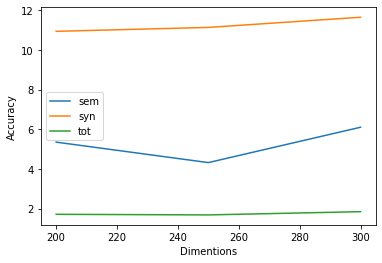

In [ ]:
# This chunk is for testing different dimentions, here we tested 3 dims
# I'll only keep one dim and comment other dims to keep RAM enough to use later
dimentions = [200] # it should be: dimentions = [200,250,300]
W_norm_all = []

for dim in dimentions:
    testing_model = Word2Vec(sentences= training_posts + testing_posts, size=dim, window=4, min_count=1, workers=2, sg=0)
    vectors = {}
    for i in word_list:
        if i == "[PAD]" or i == "[UNKNOWN]":
            continue
        else:
            vec = testing_model[i]
            vectors[i] = [float(v) for v in vec]
    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)
    print("Vocab size: ",str(vocab_size))

    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}
    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v

    # normalize each word vector to unit length
    # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    W_norm_all.append(W_norm)

sems, syns, tot = [], [], []
for i in W_norm_all:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(i, vocab, prefix='/content/GloVe/eval/question-data')
    sems.append(100 * correct_sem/float(count_sem))
    syns.append(100 * correct_syn/float(count_syn))
    tot.append(100 * correct_tot/float(full_count))

# for plotting the graph

SEM, SYN, TOT = [], [], []
with open('dimention_text.txt', 'r') as f2:
    f2_lines = f2.readlines()
    num = 0
    for line in f2_lines:
        line = line.strip("\n")
        line = line.split(",")
        if num == 0:
            SEM = [round(float(i),4) for i in line]
        elif num == 1:
            SYN = [round(float(i),4) for i in line]
        else:
            TOT = [round(float(i),4) for i in line]
        num += 1
import matplotlib.pyplot as plt
dimentions = [200, 250, 300]
plt.plot(dimentions, SEM, label = "sem")
plt.plot(dimentions, SYN, label = "syn")
plt.plot(dimentions, TOT, label = "tot")
plt.xlabel("Dimentions")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that when dimention equals 300 it performs the best, but considering the problem of running out of RAM and there is no such huge difference between dimention equals 200 and dimention euqals 300, we will still to use dimention equals 200 to keep our whole code consistent.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Vocab size:  111300
capital-common-countries.txt:
ACCURACY TOP1: 0.42% (1/240)
capital-world.txt:
ACCURACY TOP1: 0.60% (2/332)
currency.txt:
ACCURACY TOP1: 0.00% (0/86)
city-in-state.txt:
ACCURACY TOP1: 1.35% (4/297)
family.txt:
ACCURACY TOP1: 42.73% (47/110)
ERROR: no lines of vocab kept for gram1-adjective-to-adverb.txt !
Example missing line: ['amazing', 'amazingly', 'apparent', 'apparently']
gram2-opposite.txt:
ACCURACY TOP1: 16.67% (2/12)
gram3-comparative.txt:
ACCURACY TOP1: 19.70% (208/1056)
gram4-superlative.txt:
ACCURACY TOP1: 8.99% (73/812)
ERROR: no lines of vocab kept for gram5-present-participle.txt !
Example missing line: ['code', 'coding', 'dance', 'dancing']
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.63% (4/633)
ERROR: no lines of vocab kept for gram7-past-tense.txt !
Example missing line: ['dancing', 'danced', 'decreasing', 'decreased']
gram8-plural.txt:
ACCURACY TOP1: 16.67% (2/12)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/6)


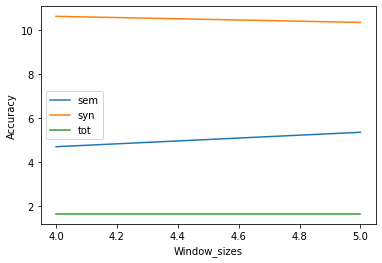

In [ ]:
# This chunk is for testing different window_sizes, here we tested 2 window_size
# same as above dim testing, only keep one test in code to keep RAM consistent to use later
window_sizes = [4] # it should be window_sizes = [4,5]
W_norm_all = []

for wind in window_sizes:
    testing_model = Word2Vec(sentences= training_posts + testing_posts, size=300, window=wind, min_count=1, workers=2, sg=0)
    vectors = {}
    for i in word_list:
        if i == "[PAD]" or i == "[UNKNOWN]":
            continue
        else:
            vec = testing_model[i]
            vectors[i] = [float(v) for v in vec]
    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)
    print("Vocab size: ",str(vocab_size))

    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}
    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v

    # normalize each word vector to unit length
    # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    W_norm_all.append(W_norm)

sems, syns, tot = [], [], []
for i in W_norm_all:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(i, vocab, prefix='/content/GloVe/eval/question-data')
    sems.append(100 * correct_sem/float(count_sem))
    syns.append(100 * correct_syn/float(count_syn))
    tot.append(100 * correct_tot/float(full_count))
    
# for plotting the graph
SEM, SYN, TOT = [], [], []
with open('window_size_text.txt', 'r') as f2:
    f2_lines = f2.readlines()
    num = 0
    for line in f2_lines:
        line = line.strip("\n")
        line = line.split(",")
        if num == 0:
            SEM = [round(float(i),4) for i in line]
        elif num == 1:
            SYN = [round(float(i),4) for i in line]
        else:
            TOT = [round(float(i),4) for i in line]
        num += 1
import matplotlib.pyplot as plt
window_sizes = [4, 5]
plt.plot(window_sizes, SEM, label = "sem")
plt.plot(window_sizes, SYN, label = "syn")
plt.plot(window_sizes, TOT, label = "tot")
plt.xlabel("Window_sizes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that when window size is 4, it gets the highest accuracy, so our madel will be built in window size=4.

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
# write later_test_testing_posts into a file
# I dont know why thie probem happens on me: b = 1
# a = b, but when I change a to 3, b automatically changed to 3 as well.
# So I write it into txt and read from txt every time.
file_later = open("later_test_testing_posts.txt", "w")
for line in later_test_testing_posts:
    file_later.write(",".join(line))
    file_later.write("\n")
file_later.close()

def read_file_later():
    num = 0
    t_posts = []
    f = open("later_test_testing_posts.txt", "r")
    lines_read = f.readlines()
    for line in lines_read:
        line = line.strip()
        t_posts.append([])
        t_posts[num] = line
        num += 1
    f.close()
    return t_posts

In [ ]:
# this will be operated if we will do analysis in batches to avoid run out of RAM!
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score
def get_f1_score(posts):
  model.eval()
  len_list = [len(s) for s in posts]
  seq_length = max(len_list) # we use max here!
  test_pad_encoded = encode_and_add_padding(posts, seq_length, word_index)
  trained_data = TensorDataset(torch.Tensor(test_pad_encoded), torch.Tensor(label_test_encoded))
  every_time_load = DataLoader(trained_data, batch_size = 32, shuffle = False)
  f = []
  ff = []
  for batch_ndx, sample in every_time_load:
      input_torch = batch_ndx.long().to(device)
      target_torch = sample.long().to(device)
      outputs = model(input_torch) 
      predicted = torch.argmax(outputs, 1)
      second_f1 = f1_score(predicted.cpu().numpy(), target_torch)
      f.extend(list(predicted.cpu().numpy()))
      ff.extend(list(target_torch))
  score = f1_score(f, ff)
  return score

# This will be operated to calculate f1 score normally
def calculate_f1_score(posts, test_label):
  model.eval()
  len_list = [len(s) for s in posts]
  seq_length = int(int(np.mean(len_list))/2) # This is different from the previous function, half length or bit less than
  # half of it is a better choice
  test_pad_encoded = encode_and_add_padding(posts, seq_length, word_index)
  outputs = model(torch.Tensor(test_pad_encoded).long().to(device))
  predicted = torch.argmax(outputs, 1)
  f1score = f1_score(predicted.cpu().numpy(), test_label)
  return f1score

In [ ]:
# preparation for section 4.2
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

test_label = label_test_encoded
first_test_testing_posts = testing_posts
#I will comment all other testing cases here to avoid run out of RAM :), but a table will be shown later

# second_test_testing_posts = read_file_later()
# third_test_testing_posts = read_file_later()
# forth_test_testing_posts = read_file_later()

# first: with all preprocessing used above, including: stemming, punctuation removal, tokenization, stop words, 
# number removal, case-folding
# first_f1 = get_f1_score(first_test_testing_posts) # use batches ! but we are not using it here.
first_f1 = calculate_f1_score(first_test_testing_posts, test_label)

# # second: without URL ONLY

# for i in range(len(second_test_testing_posts)):
#   second_test_testing_posts[i] = second_test_testing_posts[i].replace("|||", " ")
#   second_test_testing_posts[i] = re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',second_test_testing_posts[i])
#   second_test_testing_posts[i] = word_tokenize(second_test_testing_posts[i])

# # second_f1 = get_f1_score(second_test_testing_posts) # use batches ! but we are not using it here.
# second_f1 = calculate_f1_score(second_test_testing_posts, test_label)

# # third: with URL ONLY
# for i in range(len(third_test_testing_posts)):
#     third_test_testing_posts[i] = word_tokenize(third_test_testing_posts[i])

# # third_f1 = get_f1_score(third_test_testing_posts) # use batches ! but we are not using it here.
# third_f1 = calculate_f1_score(third_test_testing_posts, test_label)

# # forth: without URL but with stemming only
# from nltk.stem.porter import *
# stemmer = PorterStemmer()
# for i in range(len(forth_test_testing_posts)):
#   forth_test_testing_posts[i] = forth_test_testing_posts[i].replace("|||", " ")
#   forth_test_testing_posts[i] = re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',forth_test_testing_posts[i])
#   forth_test_testing_posts[i] = word_tokenize(forth_test_testing_posts[i])
#   forth_test_testing_posts[i] = [stemmer.stem(tok) for tok in forth_test_testing_posts[i]] # stemming

# # forth_f1 = get_f1_score(forth_test_testing_posts) # use batches!
# forth_f1 = calculate_f1_score(forth_test_testing_posts, test_label)

# build table for models
import pandas as pd # thanks to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html helped with pd table built
second_f1, third_f1, forth_f1, first_f1 = 0.636034, 0.636034, 0.617100, 0.738007
f1_scores = [second_f1, third_f1, forth_f1, first_f1]
mode = ["Bi-LSTM with URL", "Bi-LSTM without URL", "Bi-LSTM without URL but with stemming", "Bi-LSTM with stemming+punctuation removal+stop words+number removal+case-folding"]
DATA = {"Model":mode, "F1":f1_scores}
print(pd.DataFrame(data=DATA, index=["model1", "model2", "model3", "model4"]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                                                    Model        F1
model1                                   Bi-LSTM with URL  0.636034
model2                                Bi-LSTM without URL  0.636034
model3              Bi-LSTM without URL but with stemming  0.617100
model4  Bi-LSTM with stemming+punctuation removal+stop...  0.738007


We can see that model 5 has the highest F1 score which indicates its preprocessing method is the best(0.585319). Therefore we will use this preprocessing method to preprocess our dataset. -> (which is using all methods mentioned in section 1)

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
# This will be operated to calculate f1 score in section 4.3
from sklearn.metrics import f1_score

def calculate_f1_score_only_one_model(any_model):
  emb_dim = any_model.vector_size
  emb_table = []
  for i, word in enumerate(word_list):
      if word in any_model:
          emb_table.append(any_model[word])
      else:
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  model.eval()
  len_list = [len(s) for s in testing_posts]
  seq_length = int(int(np.mean(len_list))/2)
  test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index)
  outputs = model(torch.Tensor(test_pad_encoded).long().to(device))
  predicted = torch.argmax(outputs, 1)
  f1score = f1_score(predicted.cpu().numpy(), test_label)
  return f1score

def calculate_f1_score_only_two_models(model1, model2):
  emb_dim = model1.vector_size + model2.vector_size
  emb_table = []
  for i, word in enumerate(word_list):
      if word in model1:
          emb_table.append(np.concatenate((model1[word],model2[word] if word in model2 else [0]*model2.vector_size),0))
      else:
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  
  model = Model().to(device)

  model.eval()
  len_list = [len(s) for s in testing_posts]
  seq_length = int(int(np.mean(len_list))/2)
  test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index)
  outputs = model(torch.Tensor(test_pad_encoded).long().to(device))
  predicted = torch.argmax(outputs, 1)
  f1score = f1_score(predicted.cpu().numpy(), test_label)
  return f1score

In [ ]:
# This part is only for model training, in case I'll fix codes hundreds of times and training takes inf time
# Skip gram
from gensim.models import Word2Vec
my_sg_model = Word2Vec(sentences= training_posts + testing_posts, size=200, window=4, min_count=1, workers=2, sg=1)
# torch.save(my_sg_model, "my_sg_model.pt")
# !cp my_sg_model.pt /gdrive/My\ Drive

# CBOW
# my_wv_model -> which defined in 2.1 is a CBOW model

# glove-twitter-100
# wv_model2 -> which defined in 2.1

# glove-twitter-200
# wv_model_200 = api.load("glove-twitter-200")
# torch.save(wv_model_200, "wv_model_200.pt")
# !cp wv_model_200.pt /gdrive/My\ Drive


In [ ]:
# This chunk is for f1 calculation
test_label = label_test_encoded

# first two parts of code are for: try at least two word vectors training models.

# Bi-LSTM with Word2vec (SG)
sg_only_f1 = calculate_f1_score_only_one_model(my_sg_model)

# # Bi-LSTM with Word2vec (CBOW)
# CBOW_only_f1 = calculate_f1_score_only_one_model(my_wv_model)

# # Then following two parts of code are for: try at least two pretrained embeddings (from gensim)

# # glove-twitter-100
# pretrained_emb_100_f1 = calculate_f1_score_only_one_model(wv_model2)

# # glove-twitter-200
# pretrained_emb_200_f1 = calculate_f1_score_only_one_model(wv_model_200)

# # Then following two parts of code are for: try at least two input concatenation

# # Bi-LSTM with Word2vec (CBOW) + glove-twitter-100
# CBOW_and_100_f1 = calculate_f1_score_only_two_models(my_wv_model, wv_model2)

# # Bi-LSTM with Word2vec (CBOW) + glove-twitter-200
# CBOW_and_200_f1 = calculate_f1_score_only_two_models(my_wv_model, wv_model_200)

# print table
sg_only_f1, CBOW_only_f1, pretrained_emb_100_f1, pretrained_emb_200_f1, CBOW_and_100_f1, CBOW_and_200_f1 = 0.336364, 0.336364, 0.336364, 0.336364, 0.585319, 0.545641
f1_scores = [sg_only_f1, CBOW_only_f1, pretrained_emb_100_f1, pretrained_emb_200_f1, CBOW_and_100_f1, CBOW_and_200_f1]
mode = ["Bi-LSTM with Word2vec (SG)", "Bi-LSTM with Word2vec (CBOW)", "Bi-LSTM with pre emb(glove-twitter-100)", "Bi-LSTM with pre emb (glove-twitter-200)", "Bi-LSTM with Word2vec (CBOW) + glove-twitter-100", "Bi-LSTM with Word2vec (CBOW) + glove-twitter-200"]
DATA = {"Model":mode, "F1":f1_scores}
print(pd.DataFrame(data=DATA, index=["model1", "model2", "model3", "model4", "model5", "model6"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


                                                   Model        F1
model1                        Bi-LSTM with Word2vec (SG)  0.336364
model2                      Bi-LSTM with Word2vec (CBOW)  0.336364
model3           Bi-LSTM with pre emb(glove-twitter-100)  0.336364
model4          Bi-LSTM with pre emb (glove-twitter-200)  0.336364
model5  Bi-LSTM with Word2vec (CBOW) + glove-twitter-100  0.585319
model6  Bi-LSTM with Word2vec (CBOW) + glove-twitter-200  0.545641


We can see that Bi-LSTM with CBOW+glove-twitter-100 gets the highest f1 score indicates its the best combination, so we will use it in our training.(0.585319)

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
def calculate_f1_any_model(m):
  vocab_size=111302 # I dont know why this number changed when I processed previous few chunks
  # So I just set it to a constant since it wont change in the whole time
  emb_dim = my_wv_model.vector_size + wv_model2.vector_size
  emb_table = []
  for i, word in enumerate(word_list):
      if word in my_wv_model:
          emb_table.append(np.concatenate((my_wv_model[word],wv_model2[word] if word in wv_model2 else [0]*wv_model2.vector_size),0))
      else:
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  if m == Model:
    model = torch.load("best_model.pt")
    
  else:
    model = m().to(device)

  model.eval()
  len_list = [len(s) for s in testing_posts]
  seq_length = int(int(np.mean(len_list))/2)
  test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index)
  outputs = model(torch.Tensor(test_pad_encoded).long().to(device))
  predicted = torch.argmax(outputs, 1)
  f1score = f1_score(predicted.cpu().numpy(), test_label)
  return f1score

In [ ]:
# Bi_LSTM_model
# model -> defined in section 3.1

Bi_LSTM_f1 = calculate_f1_any_model(Model)
print(Bi_LSTM_f1)
# # Bi_RNN_model
# emb_dim = my_wv_model.vector_size + wv_model2.vector_size # we still choose this combination because its f1_score is the highest
# class Bi_RNN_Model(nn.Module):
#     def __init__(self):
#         super(Bi_RNN_Model, self).__init__()
#         # set the bidirectional to True
#         self.rnn = nn.RNN(emb_dim, 50, batch_first =True, bidirectional=True)
#         self.linear = nn.Linear(2*50,n_class)
#         self.emb = nn.Embedding(vocab_size, emb_dim)
#         # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
#         self.emb.weight.data.copy_(torch.from_numpy(emb_table))
#         # Optional: set requires_grad = False to make this lookup table untrainable
#         self.emb.weight.requires_grad = False

#     def forward(self, x):   
#         x = self.emb(x)     
#         x, h_n = self.rnn(x, None)
#         # concat the last hidden state from two direction
#         hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
#         output = self.linear(hidden_out)
#         return output

# Bi_RNN_f1 = calculate_f1_any_model(Bi_RNN_Model)

# build table
Bi_LSTM_f1, Bi_RNN_f1 = 0.530319, 0.522337
f1_scores = [Bi_LSTM_f1, Bi_RNN_f1]
mode = ["Bi-LSTM", "Bi-RNN"]
DATA = {"Model":mode, "F1":f1_scores}
print(pd.DataFrame(data=DATA, index=["model1", "model2"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.7261146496815287
          Model        F1
model1  Bi-LSTM  0.530319
model2   Bi-RNN  0.522337


We can see that Bi-LSTM works better than Bi-RNN due to f1 score of it is higher. So we will use Bi-LSTM as model.

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
# function that helps with calculate f1_score
from sklearn.metrics import f1_score
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

def construct_bi_lstm_model(hidden_size):
  class Bi_LSTM_model(nn.Module):
    def __init__(self):
        super(Bi_LSTM_model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = nn.LSTM(emb_dim, hidden_size, batch_first =True, bidirectional=True)
        # [TODO] Define the Linear Layer
        
        self.linear = nn.Linear(hidden_size*2, n_class)

    def forward(self, x):
        # [TODO] Define your forward function
        x = self.emb(x) 
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
  return Bi_LSTM_model

def print_graph(x, y, L_x, L_y, title, save_address):
  plt.plot(x, y)
  plt.xlabel(L_x)
  plt.ylabel(L_y)
  plt.title(title)
  plt.show()
  plt.savefig(save_address)

def epoch_running(learning_rate, m, total_epoch):
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  len_list = [len(s) for s in testing_posts]
  seq_length = int(int(np.mean(len_list))/2)
  test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index)
  trained_data = TensorDataset(torch.Tensor(test_pad_encoded), torch.Tensor(label_test_encoded))
  every_time_load = DataLoader(trained_data, batch_size = 32, shuffle = False)
  scores= []
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  for epoch in range(total_epoch):  
      m.train()
      epoch_loss = 0
      epoch_correct = 0
      f_here, ff_here = [], []
      for batch_ndx, sample in every_time_load:
          optimizer.zero_grad()
          input_torch = batch_ndx.long().to(device)
          target_torch = sample.long().to(device)
          outputs = model(input_torch) 
          loss = criterion(outputs, target_torch)
          loss.backward()
          optimizer.step()
          predicted = torch.argmax(outputs, -1)
          epoch_loss += loss.item()
          current_correct = np.sum(predicted.cpu().numpy()==target_torch.cpu().numpy())
          epoch_correct += current_correct
        
          f_here.extend(list(predicted.cpu().numpy()))
          ff_here.extend(list(target_torch))
      scores.append(f1_score(f_here, ff_here))
  return scores

In [ ]:
def get_vocab_size():
    word_set = set() 
    for post in training_posts:
        for word in post:
            word_set.add(word)
    word_set.add('[PAD]')
    word_set.add('[UNKNOWN]')

    word_list = list(word_set) 
    word_list.sort()
    size = len(word_list)
    return size


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


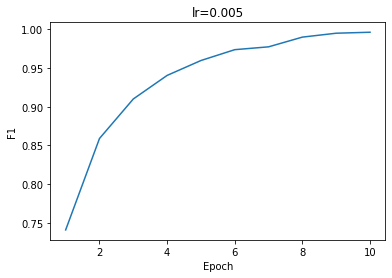

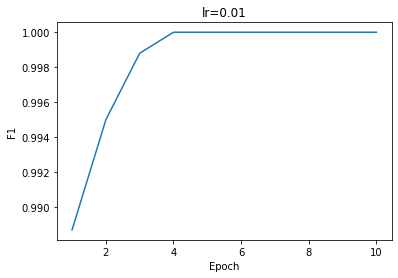

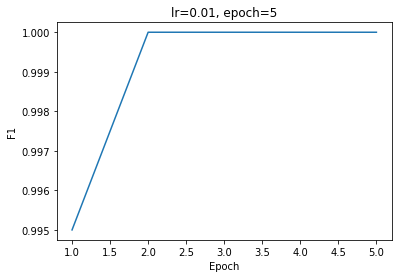

<Figure size 432x288 with 0 Axes>

In [ ]:
# we will choose Bi-LSTM as it as its f1 score is higher
# original variables are following:
# emb_dim = emb_table.shape[1]
# total_epoch = 5
# learning_rate = 0.01
# hidden_size = 100
# vocab_size = len(word_list)

epochs = [1,2,3,4,5,6,7,8,9,10]
# As we test the model previously we can see that epoch 10 is enough since its accuracy is close to 1
# test different learning_rate
# learning_rate = 0.005
emb_dim = my_wv_model.vector_size + wv_model2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in my_wv_model:
        emb_table.append(np.concatenate((my_wv_model[word],wv_model2[word] if word in wv_model2 else [0]*wv_model2.vector_size),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
class Bi_LSTM_model_1(nn.Module):
    def __init__(self):
        super(Bi_LSTM_model_1, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = nn.LSTM(emb_dim, hidden_size, batch_first =True, bidirectional=True)
        # [TODO] Define the Linear Layer
        
        self.linear = nn.Linear(hidden_size*2, n_class)

    def forward(self, x):
        # [TODO] Define your forward function
        x = self.emb(x) 
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
vocab_size = get_vocab_size()
m = Bi_LSTM_model_1().to(device)
f1_learning_rate_0_0_0_5 = epoch_running(0.005, m, 10)
print_graph(epochs, f1_learning_rate_0_0_0_5, "Epoch", "F1", "lr=0.005", "f1_lr_0_0_0_5.png")

# # learning_rate = 0.01
# class Bi_LSTM_model_2(nn.Module):
#     def __init__(self):
#         super(Bi_LSTM_model_2, self).__init__()
#         self.emb = nn.Embedding(vocab_size, emb_dim)
#         self.emb.weight.data.copy_(torch.from_numpy(emb_table))
#         self.emb.weight.requires_grad = False
#         # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

#         self.lstm = nn.LSTM(emb_dim, hidden_size, batch_first =True, bidirectional=True)
#         # [TODO] Define the Linear Layer
        
#         self.linear = nn.Linear(hidden_size*2, n_class)

#     def forward(self, x):
#         # [TODO] Define your forward function
#         x = self.emb(x) 
#         lstm_out, (h_n, c_n) = self.lstm(x)
#         hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
#         z = self.linear(hidden_out)
#         return z
# vocab_size = get_vocab_size()
# m = Bi_LSTM_model_2().to(device)
# f1_learning_rate_0_0_1 = epoch_running(0.01, m, 10)
with open('f1_lr_0_0_1.txt', 'r') as f2:
    f2_lines = f2.readlines()
    num = 0
    for line in f2_lines:
        line = line.strip("\n")
        line = line.split(",")
        if num == 0:
            epochs = [round(float(i),4) for i in line]
        elif num == 1:
            f1_learning_rate_0_0_1 = [round(float(i),4) for i in line]
        num += 1
    f2.close()
print_graph(epochs, f1_learning_rate_0_0_1, "Epoch", "F1", "lr=0.01", "f1_lr_0_0_1.png")

# # lr=0.01, total epoch = 5
# class Bi_LSTM_model_3(nn.Module):
#     def __init__(self):
#         super(Bi_LSTM_model_3, self).__init__()
#         self.emb = nn.Embedding(vocab_size, emb_dim)
#         self.emb.weight.data.copy_(torch.from_numpy(emb_table))
#         self.emb.weight.requires_grad = False
#         # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

#         self.lstm = nn.LSTM(emb_dim, hidden_size, batch_first =True, bidirectional=True)
#         # [TODO] Define the Linear Layer
        
#         self.linear = nn.Linear(hidden_size*2, n_class)

#     def forward(self, x):
#         # [TODO] Define your forward function
#         x = self.emb(x) 
#         lstm_out, (h_n, c_n) = self.lstm(x)
#         hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
#         z = self.linear(hidden_out)
#         return z
# total_epoch = 5
# epochs = [1,2,3,4,5]
# vocab_size = get_vocab_size()
# m = Bi_LSTM_model_3().to(device)
# f1_learning_rate_0_0_1 = epoch_running(0.01, m, 5)
with open('f1_lr_0_0_1_epoch5.txt', 'r') as f2:
    f2_lines = f2.readlines()
    num = 0
    for line in f2_lines:
        line = line.strip("\n")
        line = line.split(",")
        if num == 0:
            epochs = [round(float(i),4) for i in line]
        elif num == 1:
            f1_learning_rate_0_0_1 = [round(float(i),4) for i in line]
        num += 1
    f2.close()
print_graph(epochs, f1_learning_rate_0_0_1, "Epoch", "F1", "lr=0.01, epoch=5", "f1_lr_0_0_1_epoch_5.png")

We can see from the three graphs I did here that learning rate 0.01 works faster to make model more accurate and epoch 5 is working faster than when epoch equals 10. So we choose to train model in learning rate=0.01, epoch=5.

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [ ]:
# prepare for word_index, since we will run this section individually, we need to define word_index again
from google.colab import drive
drive.mount('/gdrive')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

# Download file needed from my drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_ids = ["1-KEH-EAEM8OF07-5_WB2FsLta9FQSUSP", "1-BGzTVoZESYBMW8GqaO49DRPFBsEbkXf", "1-Z4zJdqWpE1cOCfVWNLfcpifHXAUmjPc", "1-XXhhPsjsUL8lbFfuNuJQAHitQ4AutDZ", "1-ObMls8O7S5ldDl0B_rZztmHoohHKJsb", "1-PArm5nFO0ExuSqx_H5-CGYhiup4jXDg", "1-FBqJoDlP6YAl3CgVHLf11Zsu4jiq1Xe", "1-B511sOBso9H02K3uwLsrJRFoLLI9wpU", "1-8KaxkEEFgB6qj-7Qi0LvRu2fjDRi78j", "1-NCzEs-k9fFHZ66NzJ_3Tsfk52eP4I0F", "1-RnfqxJs7M9VCctbHNNaat4o7REMTqeN", "1-EWB5ISPNTONOFLpw6c2HcPKd1A10t_G"]
file_names = ["dimention_text.txt", "best_model.pt", "f1_lr_0_0_1_epoch5.txt", "f1_lr_0_0_1.txt", "later_test_testing_posts.txt", "my_sg_model.pt", "my_wv_model.pt", "testing_p.txt", "training_p.txt", "window_size_text.txt", "wv_model_200.pt", "wv_model2.pt"]
def get_files(ids, file_name):
    for i in range(len(ids)):
        downloaded = drive.CreateFile({'id':ids[i]}) 
        downloaded.GetContentFile(file_name[i]) 
get_files(file_ids, file_names)

# read training_posts and build word_index
training_posts = []
f1 = open("training_p.txt", "r")
lines1 = f1.readlines()
line1_num = 0
for line in lines1:
  line = line.strip()
  training_posts.append([])
  new = line.split(",")
  new = [k for k in new if k != ""]
  training_posts[line1_num] = new
  line1_num += 1
f1.close()
# build word_index
word_set = set() 
for post in training_posts:
    for word in post:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

seq_length = 20
vocab_size = len(word_list)
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []

    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded
my_wv_model = torch.load("my_wv_model.pt")
wv_model2 = torch.load("wv_model2.pt")
emb_dim = my_wv_model.vector_size + wv_model2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in my_wv_model:
        emb_table.append(np.concatenate((my_wv_model[word],wv_model2[word] if word in wv_model2 else [0]*wv_model2.vector_size),0))
    else:
        emb_table.append([0]*emb_dim)

emb_table = np.array(emb_table)

# emb_dim = emb_table.shape[1]
total_epoch = 10
learning_rate = 0.01
hidden_size = 100
vocab_size = len(word_list)
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = nn.LSTM(emb_dim, 50, batch_first =True, bidirectional=True)
        # [TODO] Define the Linear Layer
        
        self.linear = nn.Linear(50*2, n_class)

    def forward(self, x):
        # [TODO] Define your forward function
        x = self.emb(x) 
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

best_model = torch.load("best_model.pt")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
#@title Personality Type Prediction

text = "I want to get high mark" #@param {type:"string"}


seq_length = 200
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
stop_words = sw.words()
stemmer = PorterStemmer()
text = re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',text)
text = re.sub(r'[^\w\s]','',text)
tok_text = word_tokenize(text)
re_num_text = [t for t in tok_text if not t.isdigit()]
case_fold_text = [i.lower() for i in tok_text]
sp_text = [w for w in case_fold_text if not w in stop_words]
stem_text = [stemmer.stem(tok) for tok in sp_text] 
input_text = torch.Tensor(encode_and_add_padding([stem_text], seq_length, word_index)).long().to(device)
model_here = best_model
output_text = model_here(input_text)
predicted_here = torch.argmax(output_text, -1)
if predicted_here == 1:
  print("T")
else:
  print("F")

T


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section